In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [3]:
wine_dataset = pd.read_csv("E:\\Datasets\\Wine Quality Using Random Forest\\winequality-red (1).csv")

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.shape

(1599, 12)

In [6]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

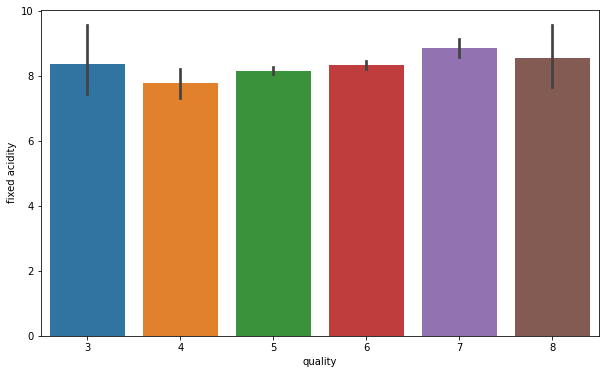

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

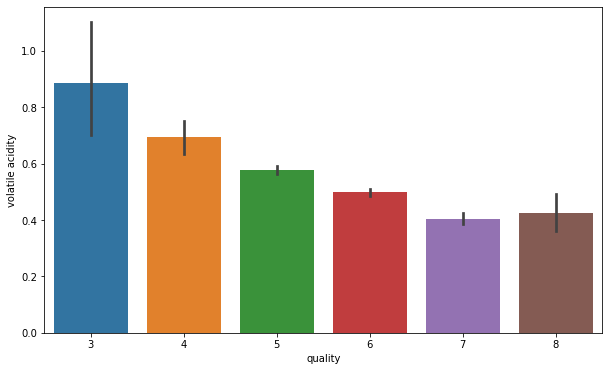

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

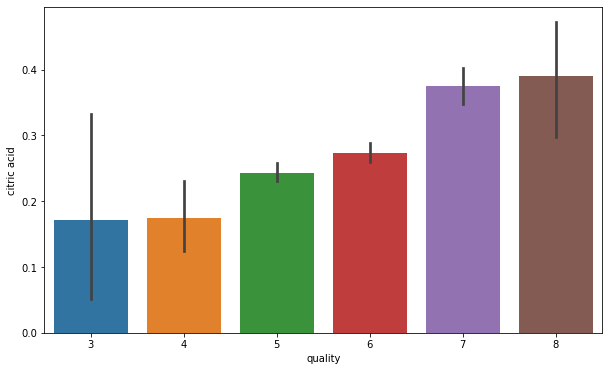

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

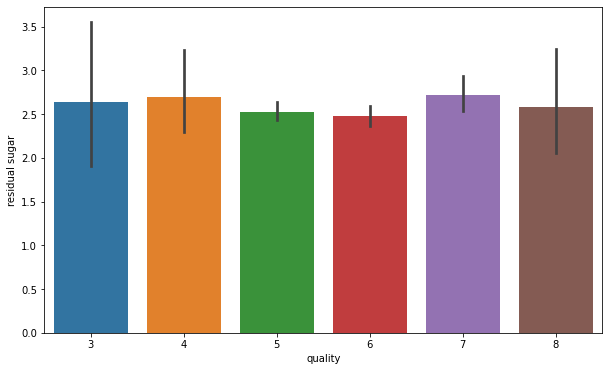

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

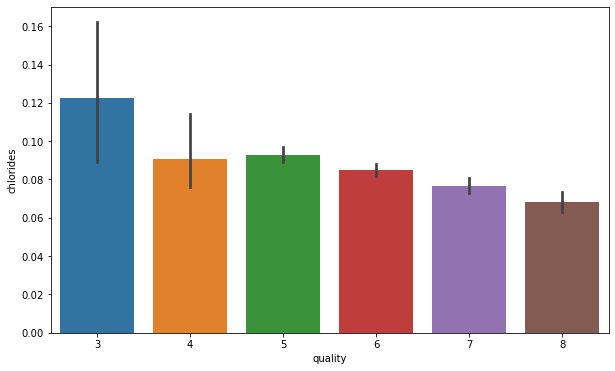

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

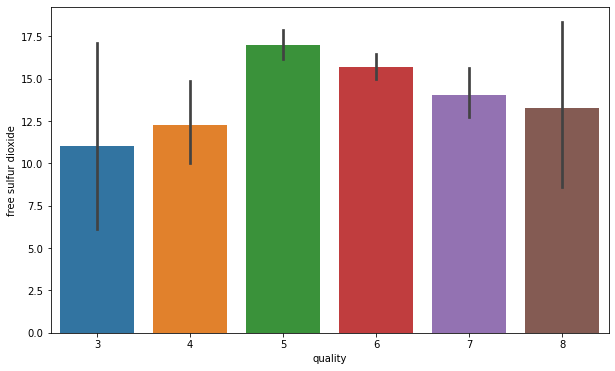

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

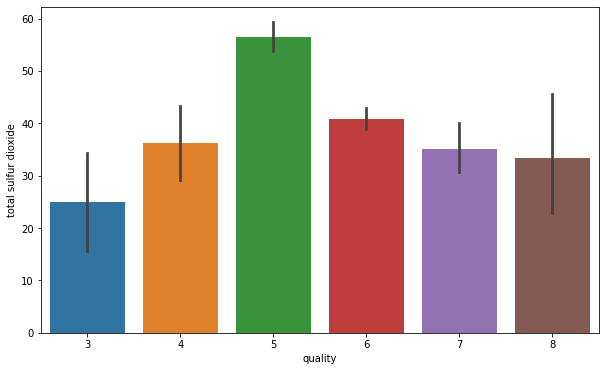

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

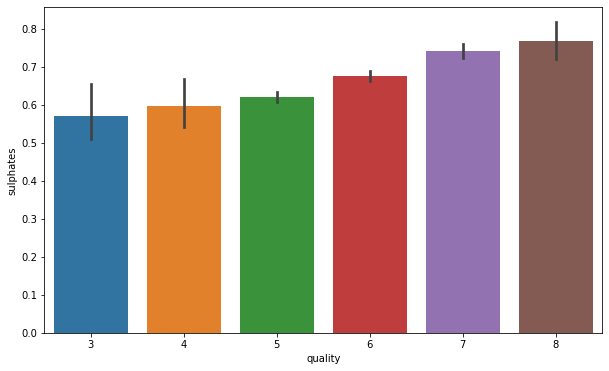

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

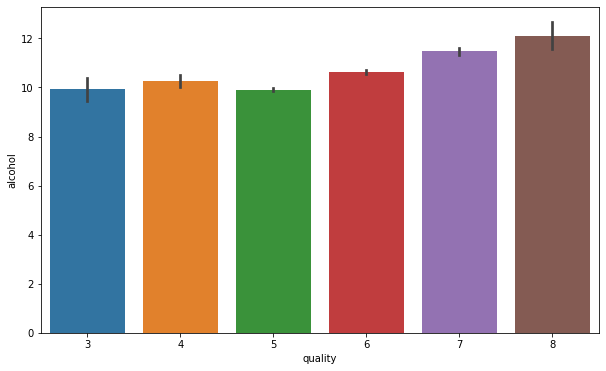

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='pH'>

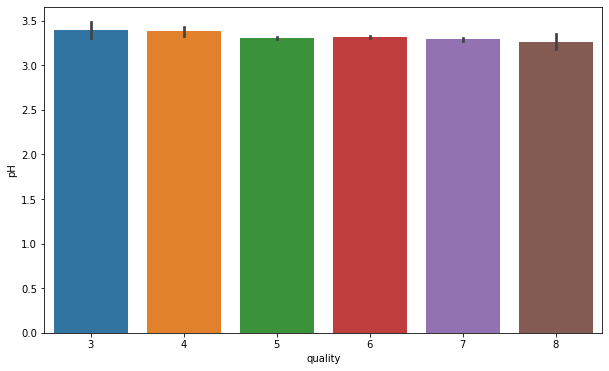

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='pH', data=wine_dataset)

In [23]:
wine_dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x>6.5 else 0)
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
wine_dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Adrija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

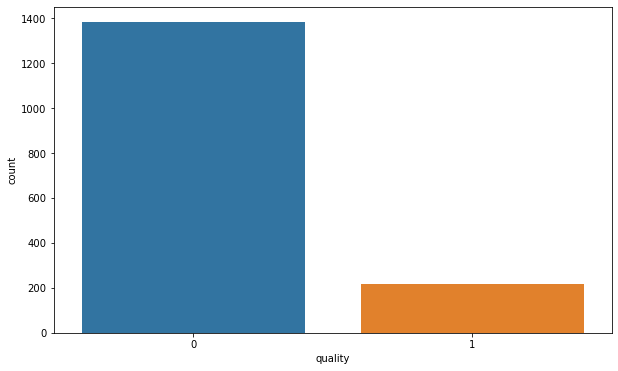

In [27]:
fig = plt.figure(figsize=(10,6))
sns.countplot(wine_dataset['quality'])

In [28]:
x = wine_dataset.iloc[:, :-1].values
y = wine_dataset.iloc[:, -1].values

In [29]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [30]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [33]:
x_train.shape

(1279, 11)

In [34]:
x_test.shape

(320, 11)

In [35]:
y_train.shape

(1279,)

In [36]:
y_test.shape

(320,)

In [37]:
sc = StandardScaler()

In [38]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [39]:
rf_regressor = RandomForestClassifier(n_estimators=100)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[266,   7],
       [ 31,  16]], dtype=int64)

<Figure size 720x432 with 0 Axes>

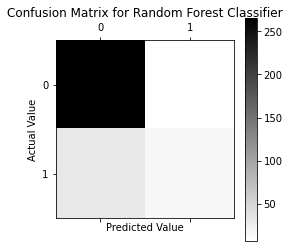

In [43]:
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [50]:
print("Total Predictions: ", len(y_pred))
print("Total Correct Predictions: ", sum(y_pred == y_test))
print("Accuracy: ", sum(y_pred == y_test)*100/len(y_pred),"%")

Total Predictions:  320
Total Correct Predictions:  280
Accuracy:  87.5 %


In [48]:
svc_regressor = SVC()

In [49]:
svc_regressor.fit(x_train, y_train)
y_pred = svc_regressor.predict(x_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[268,   5],
       [ 35,  12]], dtype=int64)

<Figure size 720x432 with 0 Axes>

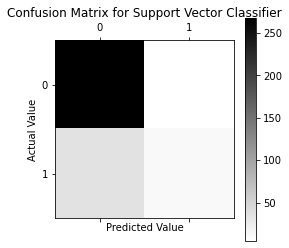

In [52]:
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.colorbar()
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [53]:
print("Total Predictions: ", len(y_pred))
print("Total Correct Predictions: ", sum(y_pred == y_test))
print("Accuracy: ", sum(y_pred == y_test)*100/len(y_pred),"%")

Total Predictions:  320
Total Correct Predictions:  280
Accuracy:  87.5 %


In [55]:
rf_eval = cross_val_score(estimator=rf_regressor, X=x_train, y=y_train, cv=10)
rf_eval.mean()

0.907769438976378